In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load the data from csv file

df_ab_test=pd.read_csv('/content/ab_test_click_data (1).csv')

print(df_ab_test.describe())
print(df_ab_test.groupby("group").sum("click"))

            user_id         click
count  20000.000000  20000.000000
mean   10000.500000      0.405250
std     5773.647028      0.490953
min        1.000000      0.000000
25%     5000.750000      0.000000
50%    10000.500000      0.000000
75%    15000.250000      1.000000
max    20000.000000      1.000000
         user_id  click
group                  
con    150005000   1989
exp     50005000   6116


In [4]:
df_ab_test

,user_id,click,group,timestamp
0,1,1,exp,2024-01-01 00:00:00
1,2,0,exp,2024-01-01 00:01:00
2,3,1,exp,2024-01-01 00:02:00
3,4,0,exp,2024-01-01 00:03:00
4,5,1,exp,2024-01-01 00:04:00
...,...,...,...,...
19995,19996,1,con,NaN
19996,19997,1,con,NaN
19997,19998,1,con,NaN
19998,19999,0,con,NaN


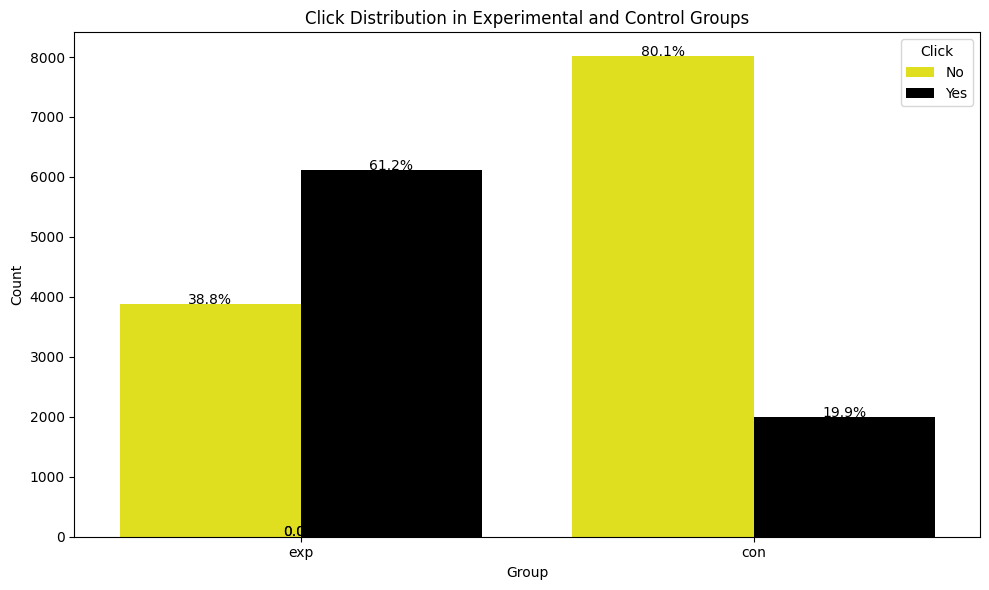

In [6]:
palette={0:'yellow',1:'black'}

plt.figure(figsize=(10,6))
ax=sns.countplot(x='group',hue='click',data=df_ab_test,palette=palette)
plt.title("Click Distribution in Experimental and Control Groups")
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title='Click',labels=['No','Yes'])


group_counts=df_ab_test.groupby(['group']).size()
group_click_counts=df_ab_test.groupby(['group','click']).size().reset_index(name='count')

for p in ax.patches:
  height=p.get_height()
  #Find the group and click type for the current bar
  group='exp' if p.get_x()<0.5 else'con'
  click=1 if p.get_x()%1>0.5 else 0
  total=group_counts.loc[group]
  percentage=100*height/total
  ax.text(p.get_x() + p.get_width() /2.,height+5,f'{percentage:.1f}%',ha="center",color='black',fontsize=10)

plt.tight_layout()
plt.show()

In [7]:
alpha=0.05

delta=0.1

In [8]:
#calculating total number of clicks per group by summing clicks

x_con=df_ab_test.groupby('group')["click"].sum().loc["con"]
x_exp=df_ab_test.groupby('group')["click"].sum().loc['exp']

In [9]:
print(df_ab_test.groupby('group')["click"].sum())
print("Number of Clicks in control:",x_con)
print("Number of clicks in Experimental:",x_exp)

group
con    1989
exp    6116
Name: click, dtype: int64
Number of Clicks in control: 1989
Number of clicks in Experimental: 6116


In [10]:
N_exp = 10000
N_con = 10000

In [11]:
# computing the estimate of click probability per group
p_con_hat = x_con/N_con
p_exp_hat = x_exp/N_exp
print("Click Probability in Control Group:", p_con_hat)
print("Click Probability in Experimental Group:", p_exp_hat)

Click Probability in Control Group: 0.1989
Click Probability in Experimental Group: 0.6116


In [13]:
# computing the estimate of pooled clicked probability
p_pooled_hat = (x_con+x_exp)/(N_con + N_exp)


In [14]:
# computing the estimate of pooled variance
pooled_variance = p_pooled_hat * (1-p_pooled_hat) * (1/N_con + 1/N_exp)
print("p^_pooled is: ", p_pooled_hat)
print("pooled_variance is: ", pooled_variance)

p^_pooled is:  0.40525
pooled_variance is:  4.82044875e-05


In [15]:
# computing the standard error of the test
SE = np.sqrt(pooled_variance)
print("Standard Error is: ", SE)

Standard Error is:  0.006942945160376826


In [16]:
# computing the test statistics of Z-test
Test_stat = (p_con_hat - p_exp_hat)/SE
print("Test Statistics for 2-sample Z-test is:", Test_stat)

Test Statistics for 2-sample Z-test is: -59.44163326469381


In [17]:
Z_crit = norm.ppf(1-alpha/2)
print("Z-critical value from Standard Normal distribution: ", Z_crit)

p_value = 2 * norm.sf(abs(Test_stat))
print("P-value of the 2-sample Z-test: ",round(p_value,3))


CI = [round((p_exp_hat - p_con_hat) - SE*Z_crit,3), round((p_exp_hat - p_con_hat) + SE*Z_crit,3)]
print("Confidence Interval of the 2 sample Z-test is: ", CI)


Z-critical value from Standard Normal distribution:  1.959963984540054
P-value of the 2-sample Z-test:  0.0
Confidence Interval of the 2 sample Z-test is:  [np.float64(0.399), np.float64(0.426)]


We use pooled variance to estimate the variability (standard error) under the assumption that both groups have the same true underlying value (i.e., under the null hypothesis).

So:

If you're testing whether two groups are different, but assume for now that they're actually the same (null hypothesis),

Then it's logical to assume they share the same variance too,

And so we pool the data from both groups to get one estimate of that common variance.

We use the pooled estimate to calculate the standard error because the z-test assumes the null is true — that A and B come from the same population.

So, under that assumption, their variances should also come from the same source → hence, we pool.

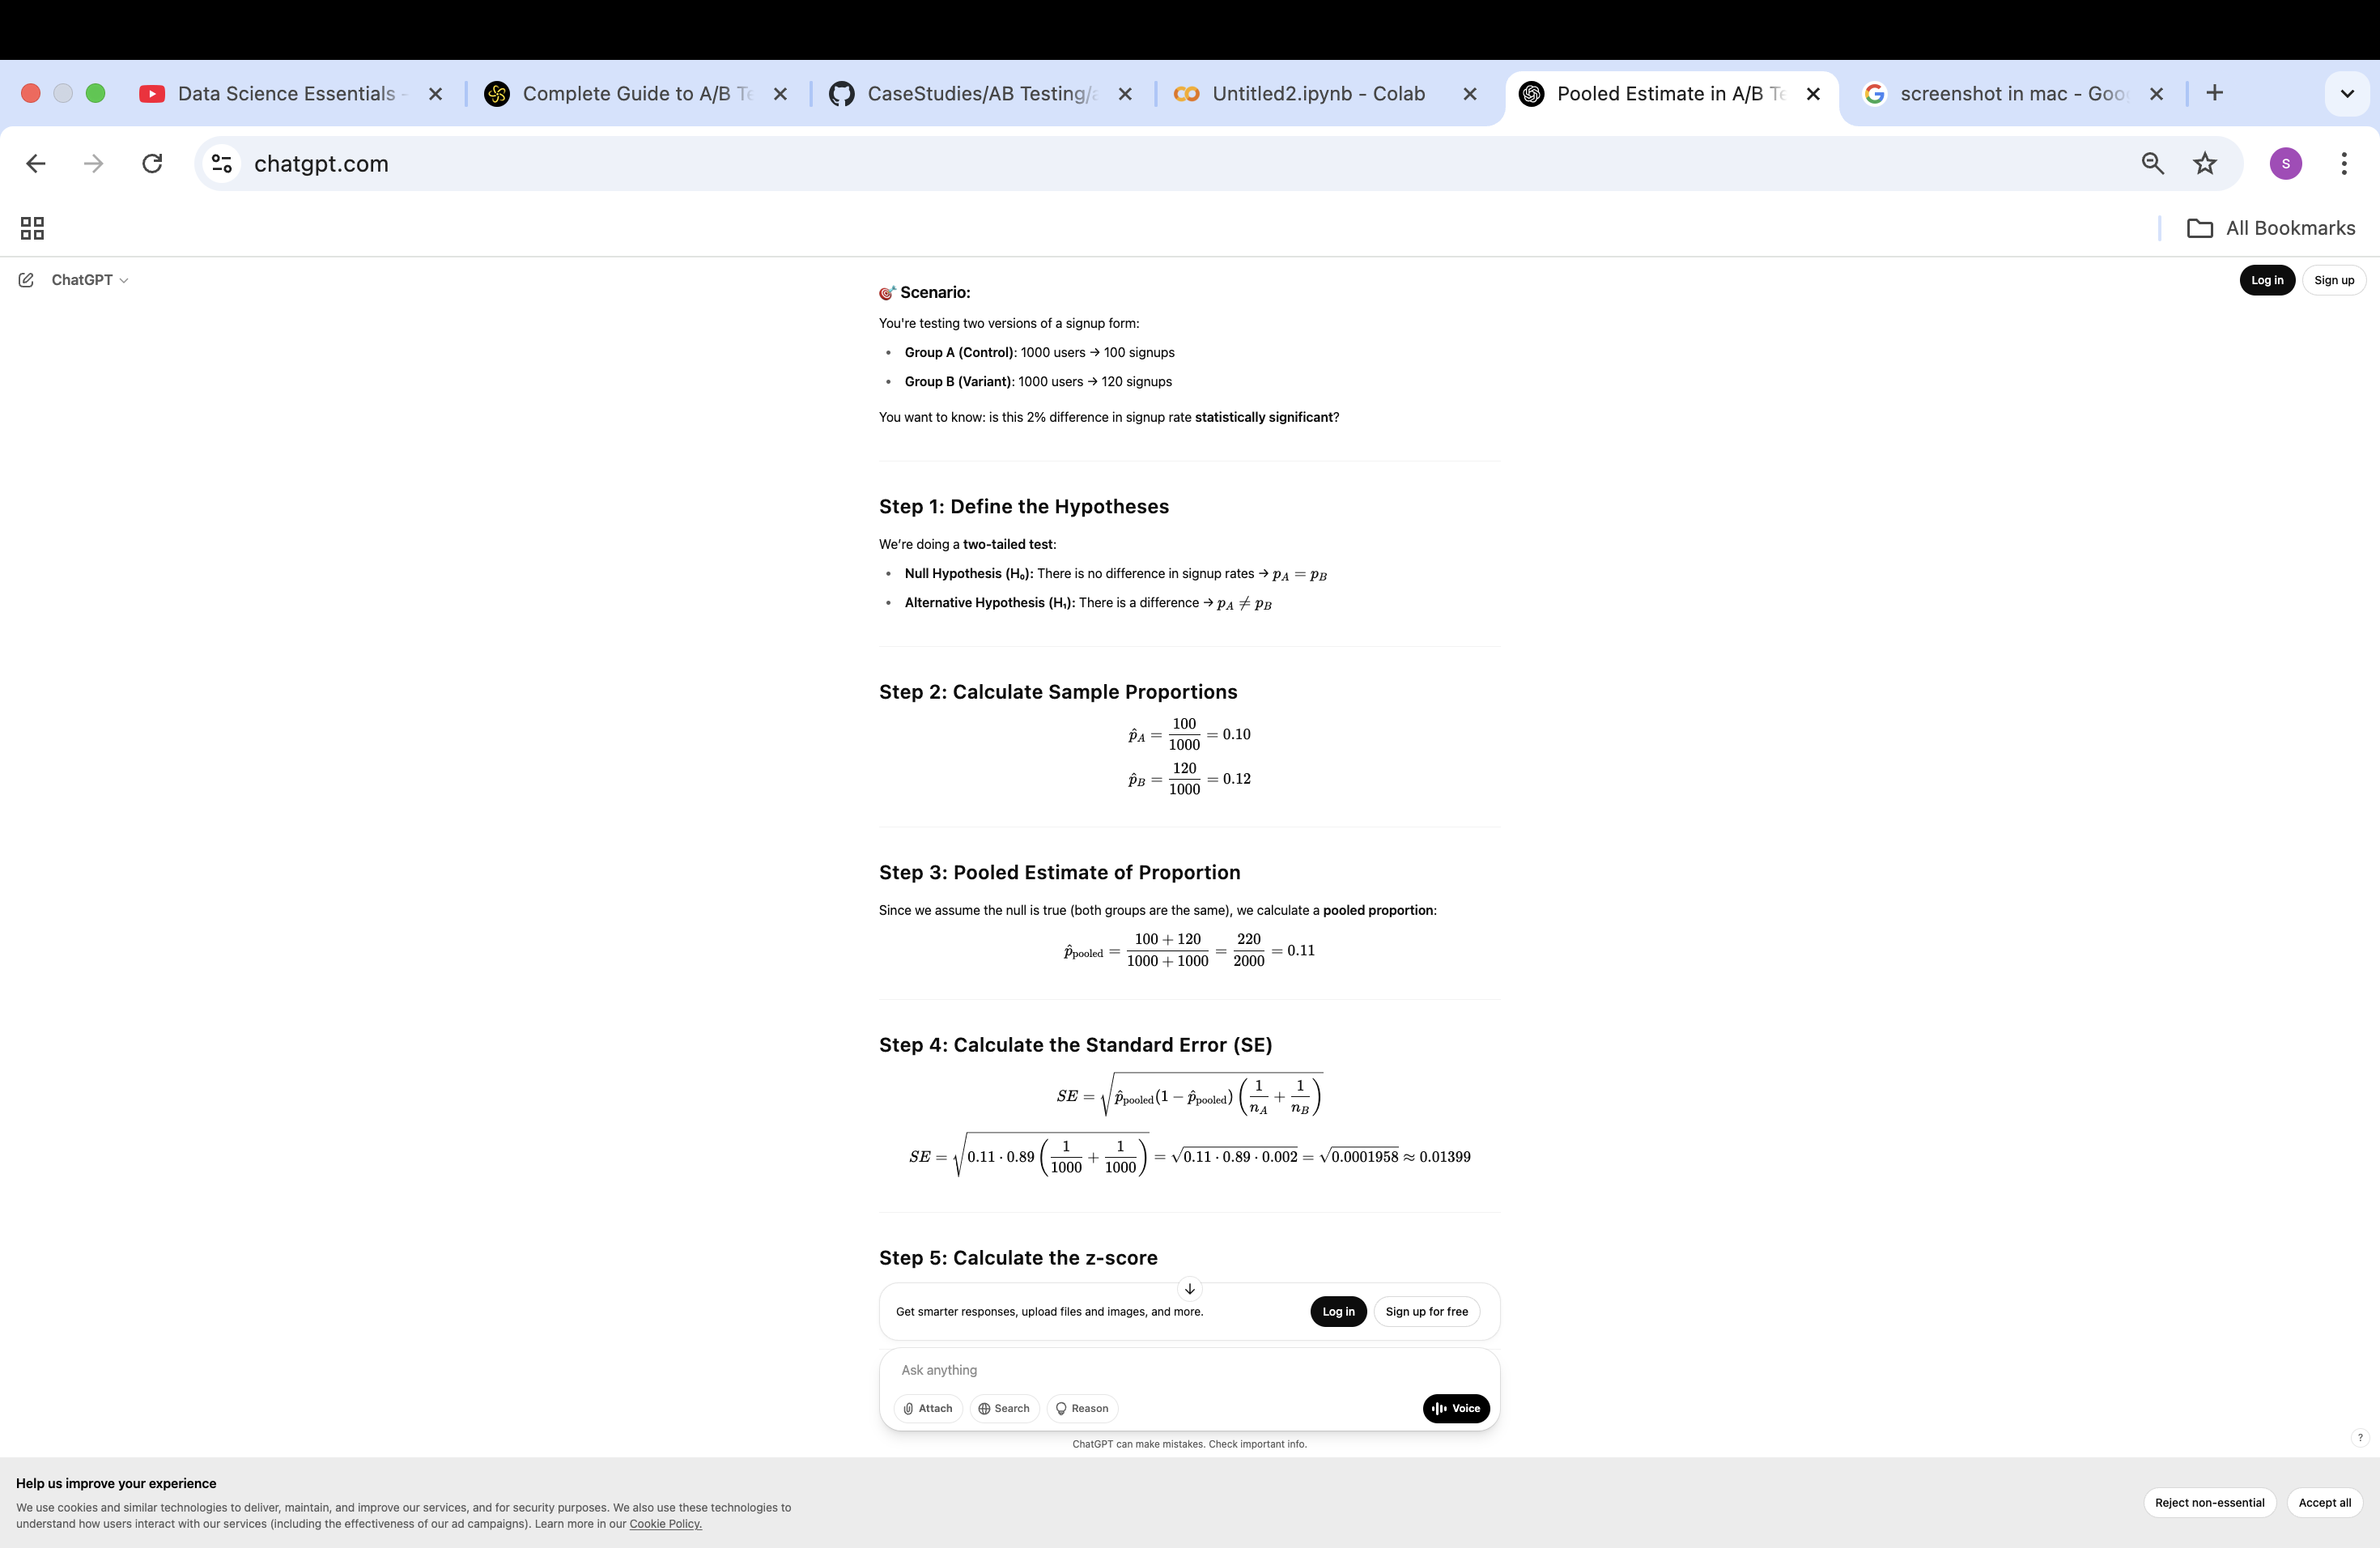

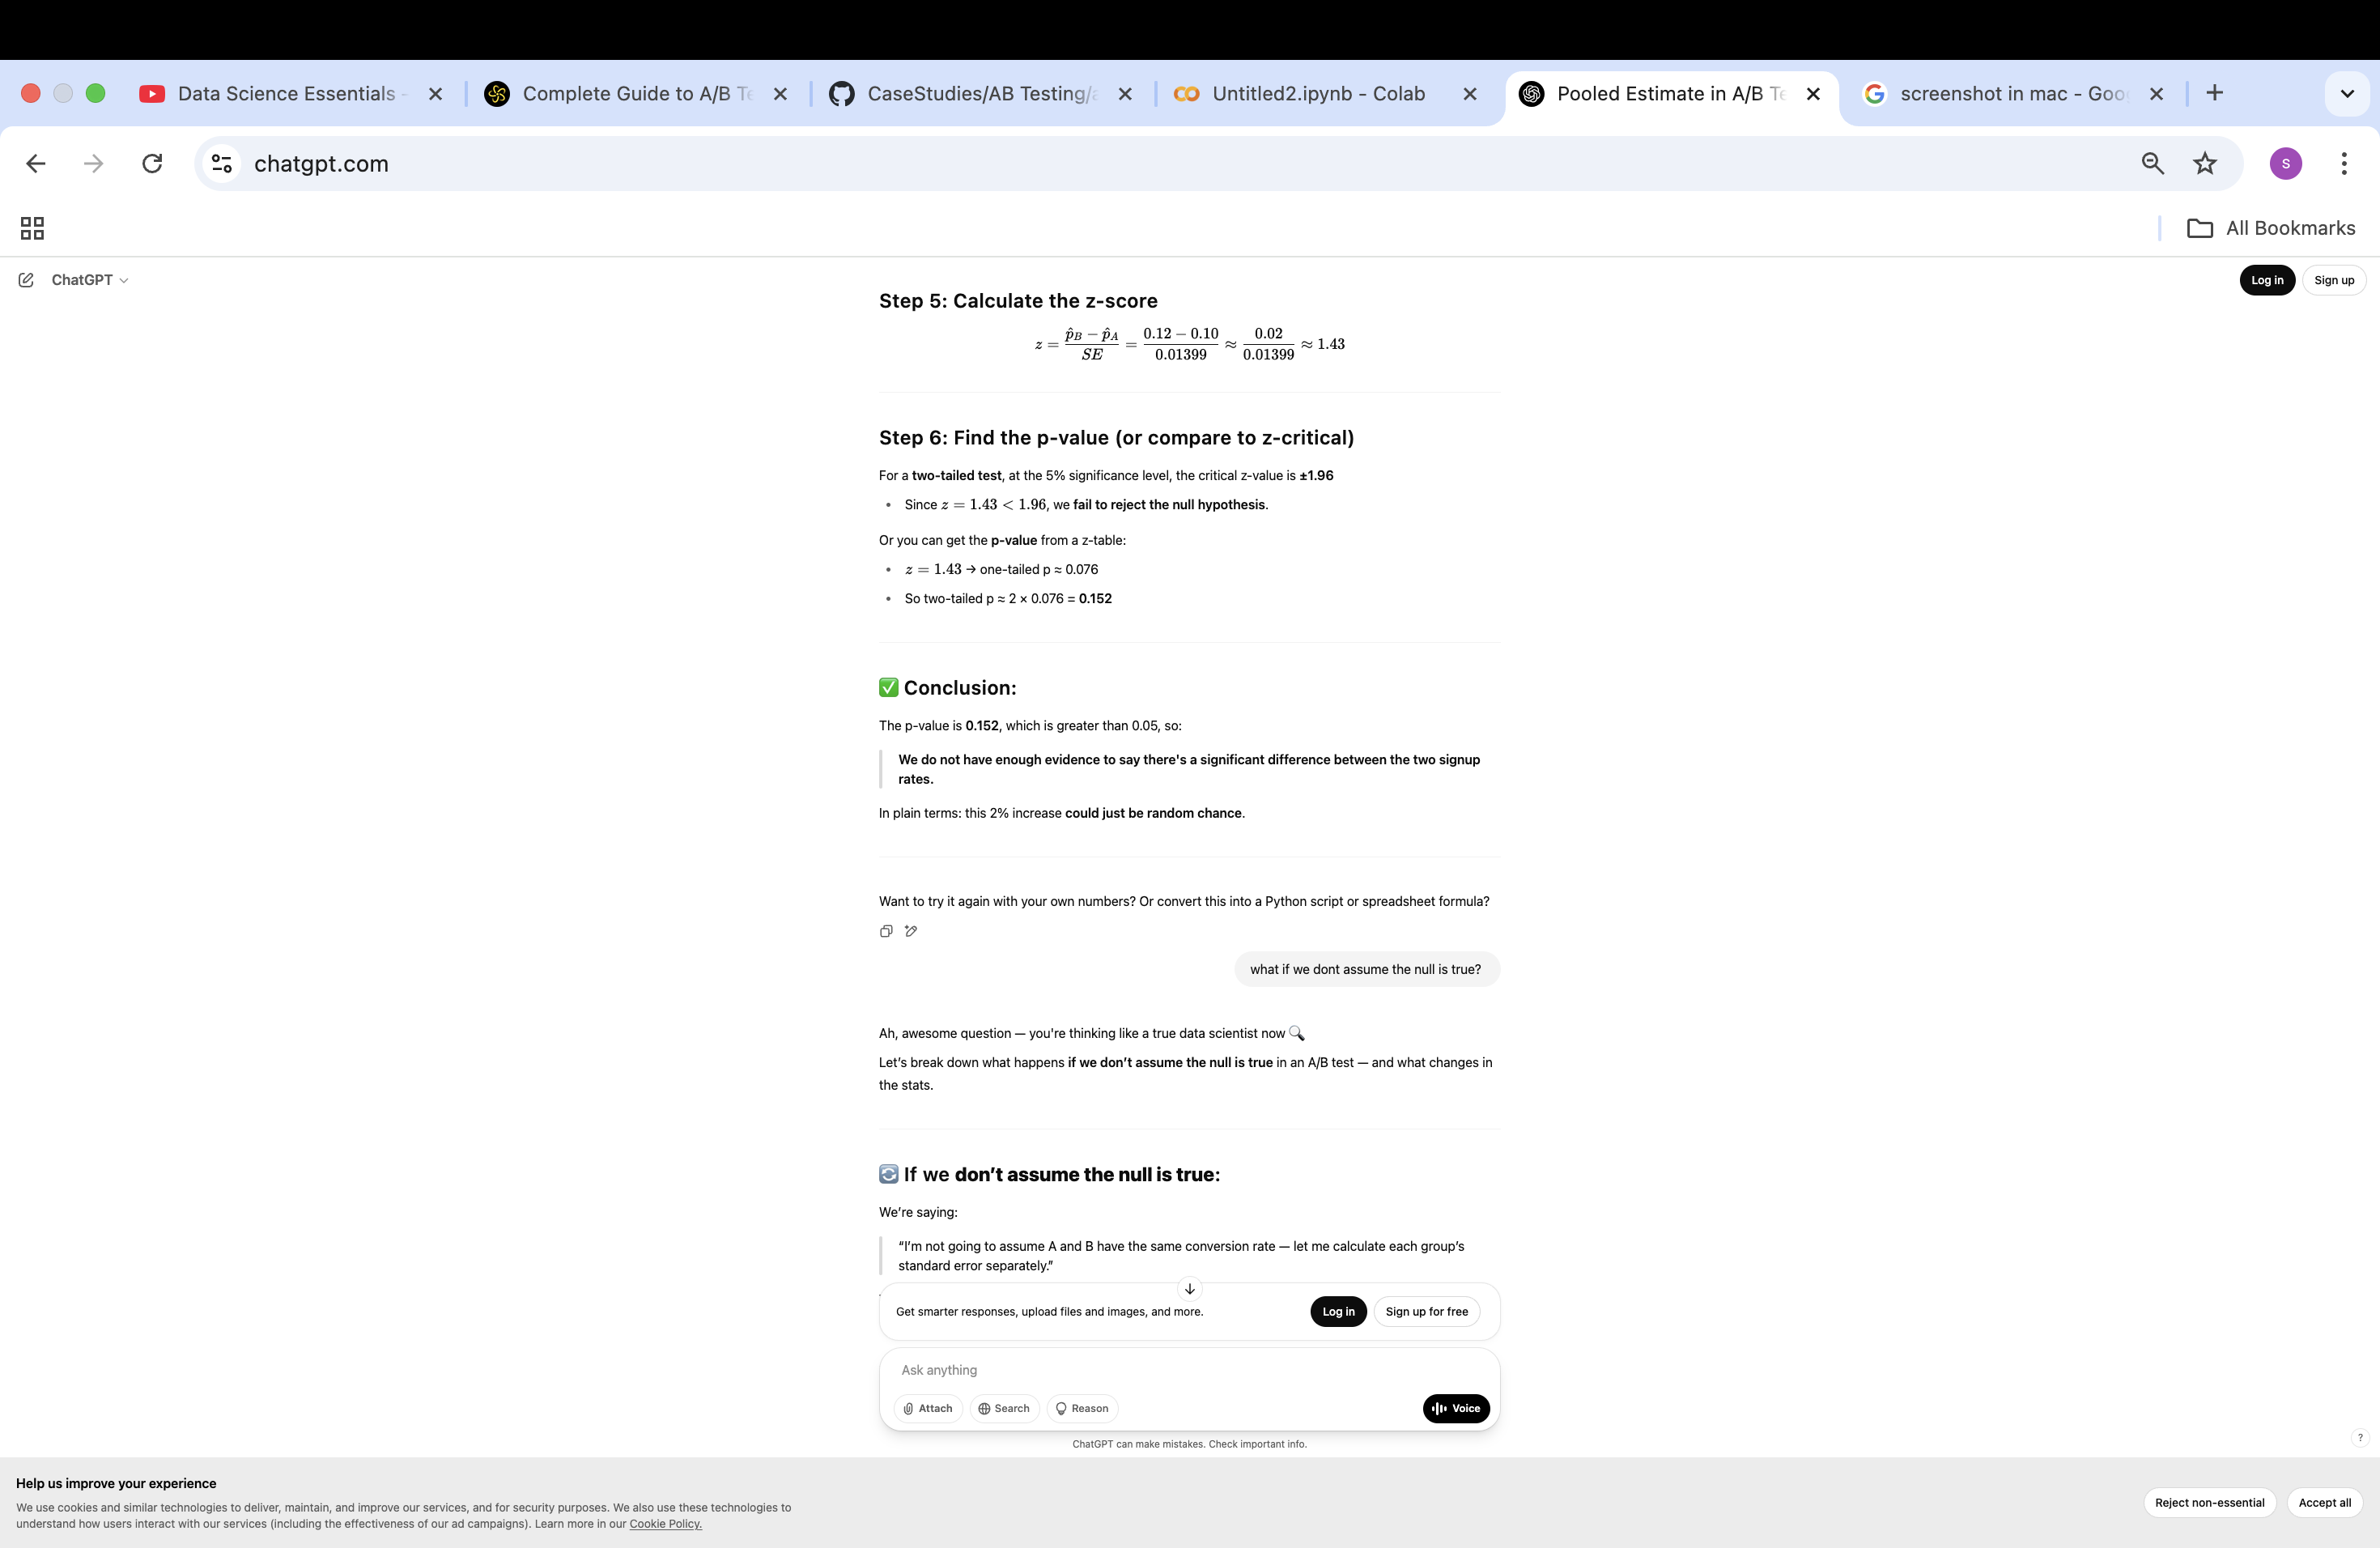